# Householder Method for Tridiagonal form of a Symmetric Matrix
### Christina Lee
### Category: Numerics
<b>Based on <i>Numerical Recipes</i> 11.3.2</b>

In the Jacobi Transformation, we elimated each off-diagonal element one by one.  Here, we eliminate entire columns at once, so we only have to sweep over the columns once, instead of everything in a triangle multiple times.  

BUT we have a trade off.  This method only gets us to tridiagonal form.  A variety of methods can then easily get us from tridiagonal form to diagonal form, but this one will only get us that far.

So we want an orthogonal matrix.  We also want it to be a function of a vector, so we can eliminate one vector at a time.  How do we construct a matrix out of a vector?
\begin{equation}
\mathbf{w} \cdot \mathbf{w}^{T}
\end{equation}
but to make it orthogonal, we need
\begin{equation}
\mathbf{P}=\mathbf{1}-2 \mathbf{w} \cdot \mathbf{w}^{T}
\end{equation}
which obeys
\begin{align}
\mathbf{P}^2 &= \left(\mathbf{1}-2 \mathbf{w} \cdot \mathbf{w}^T \right) \cdot 
\left( \mathbf{1}-2 \mathbf{w} \cdot \mathbf{w}^T \right) \\
&= 1 -  4 \mathbf{w} \cdot \mathbf{w}^T + 4 \mathbf{w} \cdot ( \mathbf{w}^T \cdot \mathbf{w} ) \cdot \mathbf{w}^T \\
&=\mathbf{1}
\end{align}
given our $\mathbf{w}$ is of unit length.  So $\mathbf{P}^2 =1$,$\mathbf{P}^T=\mathbf{P}$, which implies $\mathbf{P}^T=\mathbf{P}^{-1}$.
Since $\mathbf{w}$, had to be unit length, we can take any vector and normalize it via
\begin{equation}
 \frac{2 \mathbf{u} \cdot \mathbf{u}^T}{|u|^2}
\end{equation}

If we choose 
\begin{equation}
\mathbf{u} = \mathbf{x} \pm |\mathbf{x}|\mathbf{e}_0
\end{equation}
Then it turns out that
\begin{equation}
\mathbf{P}\cdot \mathbf{x} = \pm |\mathbf{x}| \mathbf{e}_0
\end{equation}
zeroing all but the first elements in the array.

In [2]:
using PyPlot;

In [3]:
## Here we create a random symmetric matrix
function makeA(n::Int)
    A=rand(n,n);
    for ii in 1:n
        A[ii,1:ii]=transpose(A[1:ii,ii]) 
    end
    V=eye(n) #initializing the orthogonal transformation
    return A,copy(A)
end
## One A returned will be stored to compare initial and final

makeA (generic function with 1 method)

In [108]:
# This makes a matrix easier to look at when its filled 
# with 1.043848974e-12 everywhere
function prettify(A::Array,rtol::Real=1e-10)
    Ap=copy(A)
    for ii in 1:length(A)
        if abs(Ap[ii])<rtol 
            Ap[ii]=0
        end
    end
    return Ap;
end

prettify (generic function with 2 methods)

In [6]:
function makeP(x::Array,n::Int)
    l=length(x)
    u=copy(x)
    u[1]=x[1]+norm(x)
    H=.5*sum(u.^2)
    P=eye(l)-u*transpose(u)/H
    
    Pp=eye(n,n)
    Pp[(end-l+1):end,(end-l+1):end]=P
    return Pp
end

makeP (generic function with 1 method)

In [7]:
n=10
A,A0=makeA(n);

In [8]:
function Householder(A::Array)
    n=size(A)[1]
    for ii in 1:(n-2)
        P=makeP(A[(ii+1):end,ii],n)
        A=P*A*P
    end
    return A
end

Householder (generic function with 1 method)

In [21]:
A,A0=makeA(10);
@time Householder(A);
A,A0=makeA(20);
@time Householder(A);
A,A0=makeA(50);
@time Householder(A);
A,A0=makeA(100);
@time Householder(A);
A,A0=makeA(150);
@time Householder(A);
A,A0=makeA(200);
@time Householder(A);

  0.000053 seconds (196 allocations: 40.094 KB)
  0.000128 seconds (436 allocations: 276.281 KB)
  0.001903 seconds (1.32 k allocations: 4.080 MB)
  0.029465 seconds (2.88 k allocations: 32.728 MB, 18.12% gc time)
  0.092379 seconds (4.42 k allocations: 110.739 MB, 9.76% gc time)
  0.226861 seconds (5.97 k allocations: 262.912 MB, 9.03% gc time)


In [22]:
n=[10,20,50,100,150,200]
t=[.000053,.000128,.001903,.029465,.092379,.226861]

6-element Array{Float64,1}:
 5.3e-5  
 0.000128
 0.001903
 0.029465
 0.092379
 0.226861

That was the most straight forward implementation of the idea. 
BUT
We can do better.  We just let the computer do all the manipulation for us, but we can simplify some of our expressions, so not only will there be less computer round off error, the computer will have to do less calculations per iteration.
\begin{equation}
\mathbf{p}=\frac{\mathbf{A}\cdot\mathbf{u}}{H}
\end{equation}
\begin{equation}
K=\frac{\mathbf{u}^T\cdot\mathbf{p}}{2H}
\end{equation}
\begin{equation}
\mathbf{q}=\mathbf{p}-K\mathbf{u}
\end{equation}
\begin{equation}
\mathbf{P}\cdot\mathbf{A}\cdot \mathbf{P}=
A-\mathbf{u}\cdot \mathbf{q}^T - \mathbf{q} \cdot \mathbf{u}^T
\end{equation}

In [4]:
A,A0=makeA(4)

(
4x4 Array{Float64,2}:
 0.630279  0.798797  0.650099  0.733251
 0.798797  0.2472    0.17569   0.104236
 0.650099  0.17569   0.848353  0.56444 
 0.733251  0.104236  0.56444   0.684609,

4x4 Array{Float64,2}:
 0.630279  0.798797  0.650099  0.733251
 0.798797  0.2472    0.17569   0.104236
 0.650099  0.17569   0.848353  0.56444 
 0.733251  0.104236  0.56444   0.684609)

In [31]:
function Householder2(A::Array)
    l=size(A)[1]
    for ii in 1:(l-2)
        u=[zeros(ii);A[ii+1:end,ii]]
        u[ii+1]=u[ii+1]+norm(u)
        H=.5*sum(u.^2)
        
        p=A*u/H
        K=dot(u,p)/(2*H)
        q=p-K*u
        
        A=A-u*transpose(q)-q*transpose(u)
    end
    
    return A;
end

Householder2 (generic function with 1 method)

In [135]:
A,A0=makeA(6)
A

6x6 Array{Float64,2}:
 0.997473   0.947874  0.0870427  0.516195  0.0453324  0.303447
 0.947874   0.437087  0.538868   0.479811  0.679562   0.478101
 0.0870427  0.538868  0.916808   0.675501  0.99092    0.1487  
 0.516195   0.479811  0.675501   0.890963  0.738793   0.31393 
 0.0453324  0.679562  0.99092    0.738793  0.435431   0.599805
 0.303447   0.478101  0.1487     0.31393   0.599805   0.901994

In [136]:
Af=Householder2(A)
prettify(Af)

6x6 Array{Float64,2}:
  0.997473  -1.12545   0.0        0.0        0.0       0.0     
 -1.12545    1.45164  -1.53298    0.0        0.0       0.0     
  0.0       -1.53298   1.48995   -0.396809   0.0       0.0     
  0.0        0.0      -0.396809   0.199214  -0.564059  0.0     
  0.0        0.0       0.0       -0.564059   0.192697  0.176479
  0.0        0.0       0.0        0.0        0.176479  0.248786

In [134]:
A,A0=makeA(10);
@time Householder2(A);
A,A0=makeA(20);
@time Householder2(A);
A,A0=makeA(50);
@time Householder2(A);
A,A0=makeA(100);
@time Householder2(A);
A,A0=makeA(150);
@time Householder2(A);
A,A0=makeA(200);
@time Householder2(A);

  0.000061 seconds (220 allocations: 42.219 KB)
  0.000306 seconds (490 allocations: 275.078 KB)
  0.001252 seconds (1.49 k allocations: 3.919 MB)
  0.011871 seconds (3.04 k allocations: 30.734 MB, 13.64% gc time)
  0.055732 seconds (4.59 k allocations: 103.454 MB, 18.75% gc time)
  0.116397 seconds (6.14 k allocations: 244.903 MB, 16.81% gc time)


In [43]:
t2=[.000039,.000238,.001088,.013597,.05741,.118140]

6-element Array{Float64,1}:
 3.9e-5  
 0.000238
 0.001088
 0.013597
 0.05741 
 0.11814 

In [102]:
function Householder3(A::Array)
    l=size(A)[1]
    for ii in 1:(l-2)
        u=[zeros(ii);A[ii+1:end,ii]]
        u[ii+1]=u[ii+1]+norm(u)
        H=.5*sum(u.^2)
        
        K=dot(u,A*u)/(2*H.^2)
        q=Array{Float64}(l);
        for jj in 1:l
            q[jj]=-K*u[jj]
            for kk in 1:l
                q[jj]+=A[jj,kk]*u[kk]/H
            end
        end
        for jj in 1:l
            for kk in 1:l
                A[jj,kk]=A[jj,kk]-u[jj]*q[kk]-q[jj]*u[kk]
            end
        end

    end
    
    return A;
end

Householder3 (generic function with 1 method)

In [103]:
A,A0=makeA(5)

(
5x5 Array{Float64,2}:
 0.828142  0.82084    0.167905   0.302991  0.152457 
 0.82084   0.522577   0.383784   0.628239  0.0788344
 0.167905  0.383784   0.0815047  0.613356  0.841174 
 0.302991  0.628239   0.613356   0.934513  0.549796 
 0.152457  0.0788344  0.841174   0.549796  0.637833 ,

5x5 Array{Float64,2}:
 0.828142  0.82084    0.167905   0.302991  0.152457 
 0.82084   0.522577   0.383784   0.628239  0.0788344
 0.167905  0.383784   0.0815047  0.613356  0.841174 
 0.302991  0.628239   0.613356   0.934513  0.549796 
 0.152457  0.0788344  0.841174   0.549796  0.637833 )

In [109]:
prettify(Householder3(A))

5x5 Array{Float64,2}:
  0.828142  -0.90389    0.0        0.0        0.0     
 -0.90389    1.2843    -0.952873   0.0        0.0     
  0.0       -0.952873   1.01088   -0.520677   0.0     
  0.0        0.0       -0.520677   0.101281   0.41245 
  0.0        0.0        0.0        0.41245   -0.220039

In [124]:
A,A0=makeA(10);
@time Householder3(A);
A,A0=makeA(20);
@time Householder3(A);
A,A0=makeA(50);
@time Householder3(A);
A,A0=makeA(100);
@time Householder3(A);
A,A0=makeA(150);
@time Householder3(A);
A,A0=makeA(200);
@time Householder3(A);

  0.000026 seconds (84 allocations: 7.094 KB)
  0.000193 seconds (184 allocations: 22.797 KB)
  0.001130 seconds (484 allocations: 133.484 KB)
  0.008200 seconds (984 allocations: 446.891 KB)
  0.028900 seconds (1.48 k allocations: 1002.094 KB)
  0.056151 seconds (1.98 k allocations: 1.726 MB)


In [125]:
t3=[.000026,.000196,.001169,.008575,.027972,.056151];

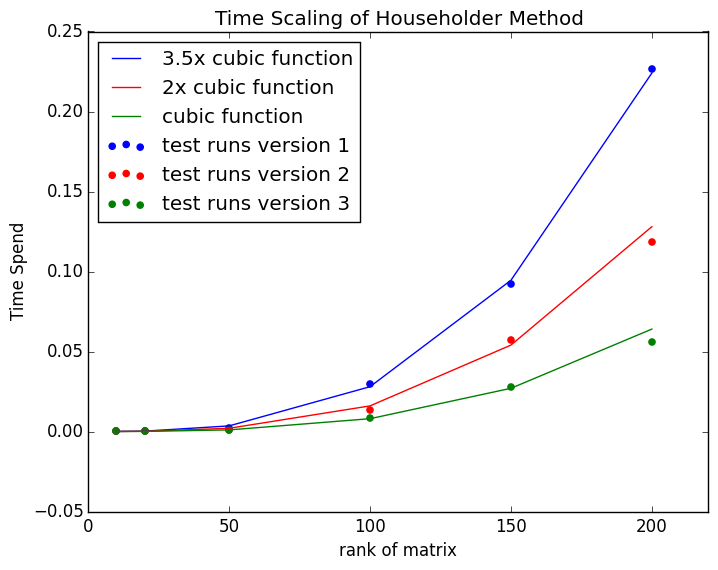

PyObject <matplotlib.legend.Legend object at 0x326494710>

In [132]:
xlim([0,220])
title("Time Scaling of Householder Method")
ylabel("Time Spend")
xlabel("rank of matrix")
scatter(n,t,marker="o",color="blue",label="test runs version 1")
scatter(n,t2,marker="o",color="red",label="test runs version 2")
scatter(n,t3,marker="o",color="green",label="test runs version 3")
plot(n,2.8e-8*n.^(3),label="3.5x cubic function")
plot(n,1.6e-8*n.^3,label="2x cubic function",color="red")
plot(n,.8e-8*n.^3,label="cubic function",color="green")
legend(loc="upper left")

In [137]:
A,A0=makeA(5)

(
5x5 Array{Float64,2}:
 0.928448  0.21094   0.478524   0.175008   0.635532 
 0.21094   0.437081  0.390216   0.139656   0.274702 
 0.478524  0.390216  0.0404452  0.826415   0.688833 
 0.175008  0.139656  0.826415   0.624961   0.0357265
 0.635532  0.274702  0.688833   0.0357265  0.470745 ,

5x5 Array{Float64,2}:
 0.928448  0.21094   0.478524   0.175008   0.635532 
 0.21094   0.437081  0.390216   0.139656   0.274702 
 0.478524  0.390216  0.0404452  0.826415   0.688833 
 0.175008  0.139656  0.826415   0.624961   0.0357265
 0.635532  0.274702  0.688833   0.0357265  0.470745 )

In [138]:
Tridiagonal(A)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Tridiagonal{T}}, ::Array{Float64,2})
This may have arisen from a call to the constructor Tridiagonal{T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert(::Type{Tridiagonal{T}}, !Matched::SymTridiagonal{T})
  convert{T}(::Type{Tridiagonal{T}}, !Matched::Diagonal{T})
  ...
while loading In[138], in expression starting on line 1